In [34]:
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import database
from snowballing.operations import reload, work_by_varname, load_work_map_all_years
from snowballing.strategies import Strategy
reload()


In [35]:
def busca(*libraries, seed=None, filter_function=None):
    filter_function = filter_function or (lambda x: x.category in ("snowball",))
    if seed is not None:
        iterable = ((1, work_by_varname(x)) for x in seed)
    else:
        iterable = load_work_map_all_years()
    seedset = set()
    visited = set()
    for _, work in iterable:
        for library in libraries:
            if int(getattr(work, library, 0)):
                visited.add(work)
                if filter_function(work):
                    seedset.add(work)
                break
    return seedset, filter_function, visited

def find_state(state, goal):
    stack = [state]
    visited = {id(state)}
    while stack:
        current = stack.pop()
        if goal == current.name:
            return current
        antecessors = current.previous[0] if current.previous else []
        for previous in antecessors:
            if id(previous) not in visited:
                visited.add(id(previous))
                stack.append(previous)
    return None
#busca("scopus", seed=["wohlin2014a", "briand2000a"], filter_function=lambda x: True)
#busca("scopus", filter_function=lambda x: False)

In [96]:
strategy = Strategy({work_by_varname("mendes2004a")})
#{x.metakey for x in strategy.backward().visited}
strategy.forward().delta_related


{Web effort estimation: The value of cross-company data set compared to single-company data set,
 Building software cost estimation models using homogenous data}

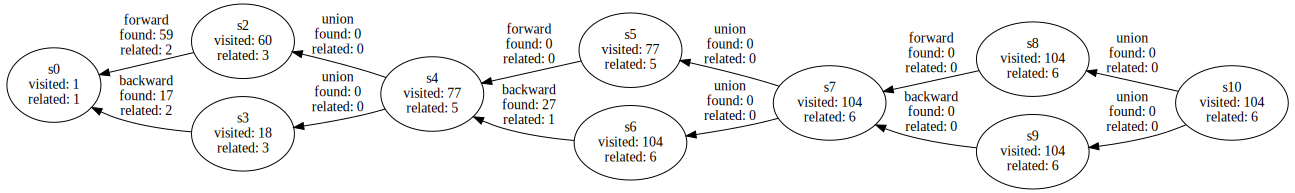

In [97]:
strategy.sfbu()

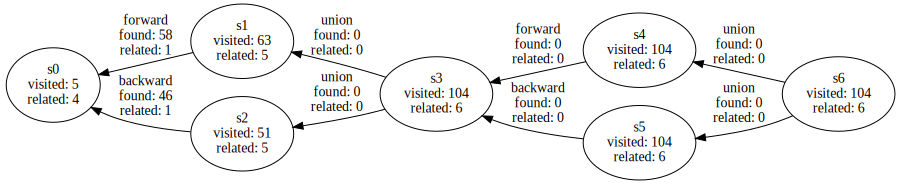

In [71]:
reload()
filter_function = lambda x: x.category in ("snowball", "forward", "backward")

strategy = Strategy(*busca("acm", "scopus", filter_function=filter_function))

state = strategy.sfbu()
#state = strategy.bbff()
#state = strategy.ffbb()
#state = strategy.s2ffbb2u()


state

In [49]:
find_state(state, "s0").related

{A comparative study of two software development cost modeling techniques using multi-organizational and company-specific data,
 Web effort estimation: The value of cross-company data set compared to single-company data set,
 Further comparison of cross-company and within-company effort estimation models for web applications,
 Performance evaluation of general and company specific models in software development effort estimation}

In [47]:
# Com backward de ferrucci2012a é possível encontrar 2 (resultado da celula)
state.related & set(strategy.ref[work_by_varname("mendes2004a")])

{A comparative study of two software development cost modeling techniques using multi-organizational and company-specific data}

In [52]:
# Com backward de ... em S2, encontrou 1 (resultado da celula)
find_state(state, "s2").delta_related & set(strategy.ref[work_by_varname("mendes2004a")])

{A comparison of cross-company and within-company effort estimation models for web applications}

In [61]:
# Com forward de ... em S1, encontrou 1 (resultado da celula)
find_state(state, "s1").delta_related & set(strategy.rev_ref[work_by_varname("mendes2004a")])

{Building software cost estimation models using homogenous data}

In [66]:
len(find_state(state, "s1").delta_visited)

58

In [64]:
#len(find_state(state, "s1").delta_visited & set(strategy.rev_ref[work_by_varname("mendes2004a")]))
# forward
len(set(strategy.rev_ref[work_by_varname("mendes2004a")]))

59

In [65]:
# backward
len(set(strategy.ref[work_by_varname("mendes2004a")]))

17

In [40]:
search_state = strategy.initial
search_state.related

{A comparative study of two software development cost modeling techniques using multi-organizational and company-specific data,
 Web effort estimation: The value of cross-company data set compared to single-company data set,
 Further comparison of cross-company and within-company effort estimation models for web applications,
 Performance evaluation of general and company specific models in software development effort estimation}

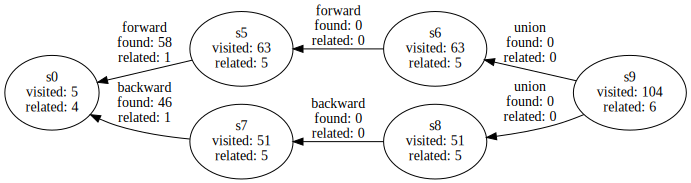

In [56]:

state = strategy.s2bbff2u()
state

In [25]:

s5 = find_state(state, "s5")
s5

In [77]:
s5.delta_related

{A first systematic mapping study on combinatorial interaction testing for software product lines,
 A review of code smell mining techniques,
 Multiphysics and multiscale software frameworks: an annotated bibliography,
 Guidelines for conducting systematic mapping studies in software engineering: An update,
 Experiences from using snowballing and database searches in systematic literature studies,
 Software engineering knowledge areas in startup companies: a mapping study,
 Automated testing of mobile applications: a systematic map and review,
 Modelling language quality evaluation in model-driven information systems engineering: A roadmap,
 A systematic mapping study of search-based software engineering for software product lines}

In [54]:
state.previous[0][1].previous[0][0].related

{Evidence-based software engineering,
 A systematic mapping study on technical debt and its management,
 Guidelines for Snowballing in Systematic Literature Studies and a Replication in Software Engineering}

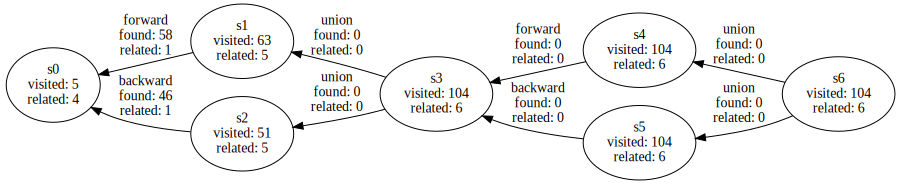

In [82]:
state

In [89]:
s1 = find_state(state, "s1")
total = sum(1 for _, w in load_work_map_all_years() if w.category == "snowball")

In [90]:
len(s1.delta_related) / len(s1.delta_visited)

0.017241379310344827

In [91]:
len(s1.delta_related) / total

0.16666666666666666

In [92]:
len(state.related) / len(state.visited)

0.057692307692307696

In [93]:
len(state.related) / total

1.0

In [74]:
state.log

deque([Step(name='start', new_references=5, new_related=4, total_visited=5, total_related=4, source='', target='s0'),
       Step(name='backward', new_references=46, new_related=1, total_visited=51, total_related=5, source='s0', target='s2'),
       Step(name='forward', new_references=58, new_related=1, total_visited=63, total_related=5, source='s0', target='s1'),
       Step(name='union', new_references=0, new_related=0, total_visited=104, total_related=6, source='s1|s2', target='s3'),
       Step(name='backward', new_references=0, new_related=0, total_visited=104, total_related=6, source='s3', target='s5'),
       Step(name='forward', new_references=0, new_related=0, total_visited=104, total_related=6, source='s3', target='s4'),
       Step(name='union', new_references=0, new_related=0, total_visited=104, total_related=6, source='s4|s5', target='s6')])

In [16]:
len(state.visited)

66

In [22]:
with open("output/snowballing.provn", "w") as provn:
    provn.write(state.provn)

In [23]:
!provconvert.bat -infile output/snowballing.provn -outfile output/snowballing.dot

In [24]:
with open("output/snowballing.dot", "r") as prov_dot:
    text = prov_dot.read().replace('rankdir="BT";', 'rankdir="RL"; ranksep="0.1";')
with open("output/snowballing.dot", "w") as prov_dot:
    prov_dot.write(text)

In [25]:
!dot -Tpng output/snowballing.dot -ooutput/snowballing.png
!dot -Tsvg output/snowballing.dot -ooutput/snowballing.svg
#!inkscape -D -z --file=output/snowballing.svg --export-pdf=output/snowballing.pdf

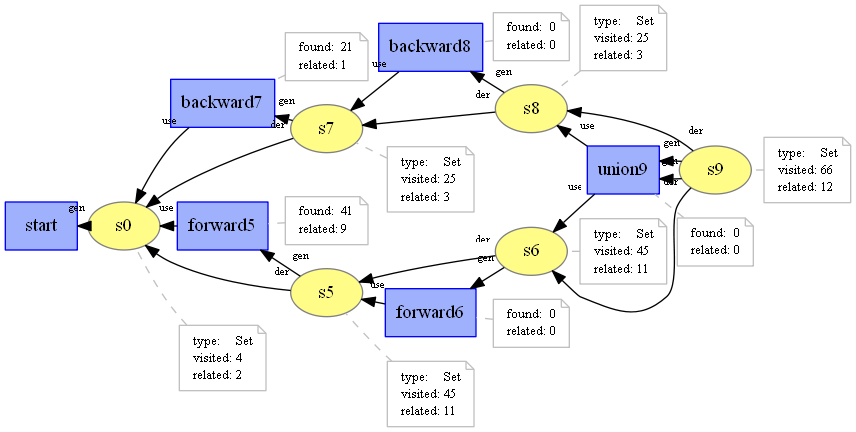

In [26]:
from IPython.display import Image
Image("output/snowballing.png")

In [72]:
log = state.log

In [31]:
len([x for _, x in load_work_map_all_years() if x.category in ('snowball','ok','backward')])

53

In [73]:
from fractions import Fraction
for step in log:
    print("precision", Fraction(step.new_related, step.new_references))

precision 4/5
precision 1/46
precision 1/58


ZeroDivisionError: Fraction(0, 0)

In [36]:
len([x for x in state.visited if x.category in {"snowball"}])

1

In [37]:
from snowballing.approaches import get_approaches
len(get_approaches())

0

In [39]:
visited = state.visited
len([(x, x.year) for x in state.visited
     if x.category in {"nofile"}
     if x.place.name != "Tech Report"
     if x.place.name != "Book"
     if x.place.name != "Patent"
     if x.place.name == "Conference"
     if x.display != x.place.acronym
    ])
#count = 0
#for x in visited:
#     if hasattr(x, 'dglibrary'):
#        print(x.dglibrary)
#        count = 1 + count
#print (count)
len([
    (x, x.year) for x in visited
     if hasattr(x, 'dglibrary') and x.dglibrary=="Scopus"
    
])

def count_ref(library,obj):
    len_dglibrary = len([(x, x.year) for x in obj
                             if hasattr(x, 'dglibrary') and library in x.dglibrary  
                        ])
    len_backward = len([(x, x.year) for x in obj
                             if x.category=="backward"  
                        ])
    len_forward = len([(x, x.year) for x in obj
                             if x.category=="forward"  
                        ])
    qtdref=0
    qtdcitations=0
    for x in obj:
        qtdref=qtdref + int(getattr(x, "references", 0))
        
    scopus = sum(int(getattr(x, "scopus", 0)) for x in obj)
            
    for x in obj:
        qtdcitations=qtdcitations + int(getattr(x, "citations", 0))
    return len_dglibrary,qtdref,qtdcitations,len_backward,len_forward
     

print ("Digital Library, Referencias, Citações, Qtd Backward, Qtd Forward")
print(count_ref("Scopus",visited))

log

print (log[0].name, log[0].new_references)
print(log[1].name, log[1].new_references)
print(log[2].name, log[2].new_references)
print(log[3].name, log[3].new_references)
print("visitados", len(visited))

Digital Library, Referencias, Citações, Qtd Backward, Qtd Forward
(2, 52, 400, 1, 10)
start 4
backward 21
forward 41
backward 0
visitados 66


In [40]:
len([x for x in visited if x.category in {"lang"}])

0

In [41]:
len([x for x in visited if x.category in {"site"}])

0

In [42]:
len([x for x in visited
     if x.place.name == "Tech Report"
    ])

1

In [43]:
len([x for x in visited
     if x.place.name == "ESEM"
    ])

0

In [44]:
{x.category for x in visited}

{'backward', 'forward', 'ok', 'snowball', 'unrelated', 'work'}

In [45]:
[(x.year, x.authors, x.name, x.place.name, x.request) for x in visited
 if x.category in {"nofile"}
 if x.place.name != "Tech Report"
 if x.place.name != "Book"
 if x.place.name != "Patent"
 if x.display != x.place.acronym]

[]

In [46]:
len(_)

0